In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df <- read.csv("results/N100-F1000-S100-R100-result-v3.csv") %>% mutate(algorithm = factor(algorithm))
summary(df)

  correlation        load      algorithm        value          
 Min.   :0.00   Min.   :0.70   BF  :10500   Min.   :       -1  
 1st Qu.:0.25   1st Qu.:0.75   RR  :10500   1st Qu.:  1489052  
 Median :0.50   Median :0.80   SALP:10500   Median :  2334822  
 Mean   :0.50   Mean   :0.80                Mean   :  2677341  
 3rd Qu.:0.75   3rd Qu.:0.85                3rd Qu.:  3476438  
 Max.   :1.00   Max.   :0.90                Max.   :353962703  

`summarise()` regrouping output by 'correlation', 'load' (override with `.groups` argument)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



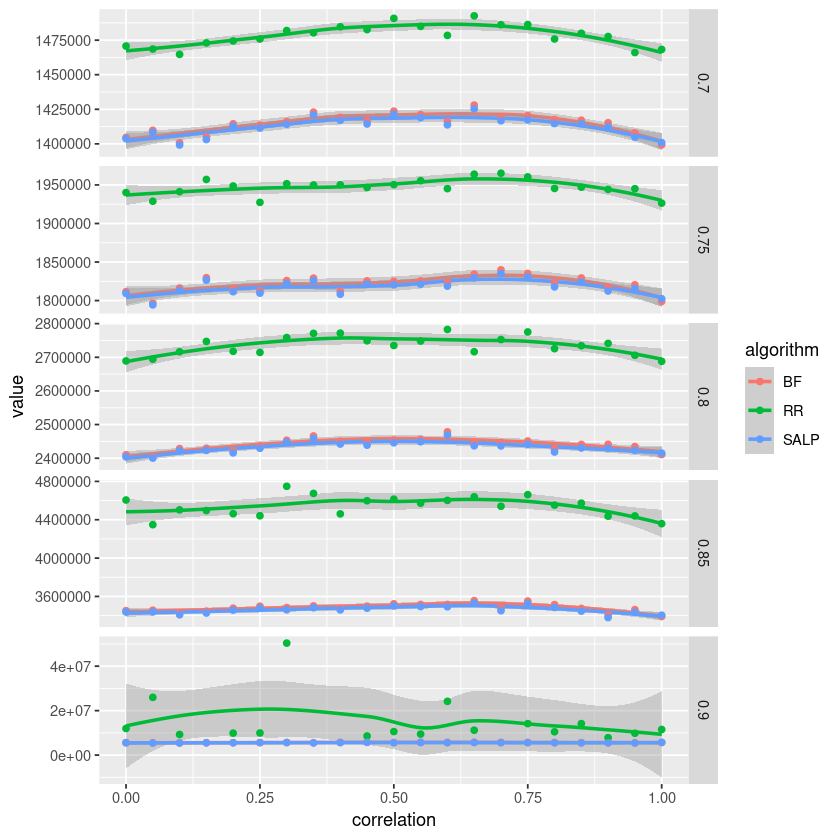

In [4]:
plt <- ggplot(
    df %>% filter(value != -1) %>% group_by(correlation, load, algorithm) %>% summarise(value=median(value)),
    aes(x=correlation, y=value, color=algorithm)
) + 
geom_smooth() + 
geom_point() + 
facet_grid(load ~ ., scales="free")

plt

In [6]:
df %>% filter(value==-1) %>% count(algorithm, load)

algorithm,load,n
<fct>,<dbl>,<int>
RR,0.80,4
RR,0.85,488
RR,0.90,2070


In [8]:
df %>% filter(algorithm == "RR" & load == "0.9") %>% count(algorithm, load)

algorithm,load,n
<fct>,<dbl>,<int>
RR,0.9,2100
